**Objective**

In this assignment, you will implement a Decision Tree Classifier from scratch using numpy. and apply it to the Adult Income Dataset. The task is to predict whether a person earns more than $50K per year. You will build the tree, evaluate it, and perform both pre-pruning and post-pruning.

**Dataset**

We will use the Adult Income Dataset from UCI.

• Dataset link: Adult Dataset

• Task: Binary classification (≤ 50K vs. > 50K).

• Features: Mix of categorical (e.g., workclass, education, occupation) and numeric (e.g., age, hours-per-week).

• Target: Income.

**Loading Instructions**

Use the following code to fetch the dataset:


In [1]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Instructions**

Follow these steps carefully. Do not skip any part.

**1. Data Preparation**

• Handle missing values (drop or impute). • Encode categorical variables into numeric values (e.g., label encoding).

• Split the dataset as:

– 80% training

– 20% validation

– 20% test

Use the validation set to tune depth and pruning.

In [5]:
adult = fetch_ucirepo(id=2)

In [6]:
X = adult.data.features
y = adult.data.targets

In [7]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [9]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [10]:
df = pd.concat([X, y], axis=1)

In [11]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [12]:
#Dropping Education coulmn , because education-num is there.
df.drop('education', axis=1, inplace=True)

In [13]:
#Checking Columns with the null values.
print(df.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [14]:
 df.dropna(subset=['workclass','occupation','native-country'],inplace=True)

In [15]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [16]:
df.shape

(47621, 14)

In [17]:
# #Label encoding in multiple coulumns.
categorical_cols = ['workclass', 'marital-status',
                     'occupation', 'relationship', 'race', 'sex', 'native-country']
le = LabelEncoder()
for col in categorical_cols :
  df[col] = le.fit_transform(df[col])

In [18]:
#After Encoding.
df

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,4,245211,13,4,10,3,4,1,0,0,40,39,<=50K.
48837,39,4,215419,13,0,10,1,4,0,0,0,36,39,<=50K.
48839,38,4,374983,13,2,10,0,4,1,0,0,50,39,<=50K.
48840,44,4,83891,13,0,1,3,1,1,5455,0,40,39,<=50K.


In [19]:
#Splitting the data.

# First split: train (80%) and temp (20%)
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)

# Second split: split temp into validation (10%) and test (10%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)


In [20]:
#Extracting Input and output fetures form the train , test and validation data.
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']

X_val = val_df.drop('income', axis=1)
y_val = val_df['income']

X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

**2. Build a Decision Tree From Scratch**

• Implement a tree recursively.

• At each split:

Compute both Gini Impurity and Entropy.

For each feature and split, calculate the weighted impurity of child nodes.

Choose the split with the highest information gain (lowest impu- rity).

• Continue splitting until:

– All samples in a node have the same label, OR

– Maximum depth is reached, OR

– No further improvement in impurity.

• Implement a function to predict for new samples.

In [21]:
# Decision tree Code from scratch.
import numpy as np
import pandas as pd
from collections import Counter

# ----- Helper Functions -----

def entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

def gini(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)

def information_gain(y, y_left, y_right, criterion='gini'):
    if len(y_left) == 0 or len(y_right) == 0:
        return 0
    if criterion == 'gini':
        parent_impurity = gini(y)
        left_impurity = gini(y_left)
        right_impurity = gini(y_right)
    else:
        parent_impurity = entropy(y)
        left_impurity = entropy(y_left)
        right_impurity = entropy(y_right)
    n = len(y)
    n_left, n_right = len(y_left), len(y_right)
    weighted_impurity = (n_left/n) * left_impurity + (n_right/n) * right_impurity
    return parent_impurity - weighted_impurity


# ----- Decision Tree Implementation -----

class DecisionTreeFromScratch:
    def __init__(self, max_depth=None, min_samples_split=2, criterion='gini'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.tree = None

    def fit(self, X, y, depth=0):
        if len(set(y)) == 1 or len(y) < self.min_samples_split or \
           (self.max_depth is not None and depth >= self.max_depth):
            return Counter(y).most_common(1)[0][0]

        n_features = X.shape[1]
        best_gain = -1
        best_split = None

        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for t in thresholds:
                left_mask = X[:, feature_idx] <= t
                right_mask = ~left_mask
                y_left, y_right = y[left_mask], y[right_mask]
                gain = information_gain(y, y_left, y_right, self.criterion)
                if gain > best_gain:
                    best_gain = gain
                    best_split = (feature_idx, t, y_left, y_right, left_mask, right_mask)

        if best_gain == 0 or best_split is None:
            return Counter(y).most_common(1)[0][0]

        feature_idx, threshold, _, _, left_mask, right_mask = best_split
        left_branch = self.fit(X[left_mask], y[left_mask], depth+1)
        right_branch = self.fit(X[right_mask], y[right_mask], depth+1)
        return (feature_idx, threshold, left_branch, right_branch)

    def train(self, X, y):
        self.tree = self.fit(X, y)

    def predict_one(self, x, node):
        if not isinstance(node, tuple):
            return node
        feature_idx, threshold, left, right = node
        if x[feature_idx] <= threshold:
            return self.predict_one(x, left)
        else:
            return self.predict_one(x, right)

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])

In [ ]:
# Convert data to numpy arrays
X_np = X_train.to_numpy()
y_np = y_train.to_numpy().ravel()
y_val_np = y_val.to_numpy().ravel()

# Encode non-numeric target labels
if y_np.dtype == 'O' or y_np.dtype.kind not in ('i', 'u'):
    unique_classes, y_np = np.unique(y_np, return_inverse=True)
if y_val_np.dtype == 'O' or y_val_np.dtype.kind not in ('i', 'u'):
    _, y_val_np = np.unique(y_val_np, return_inverse=True)

# Train with entropy criterion
tree = DecisionTreeFromScratch(max_depth=4, criterion='entropy')
tree.train(X_np, y_np)

# Predict
y_pred = tree.predict(X_val.to_numpy())
accuracy = (y_pred == y_val_np).mean()
print(f"Validation Accuracy: {accuracy:.3f}")

Validation Accuracy: 0.587


**3. Pre-Pruning (Restricting Tree Growth)**

While building the tree:

• Limit maximum depth (try depths = 2, 4, 6, and unlimited).

• Require at least a minimum number of samples (e.g., 5) to split.

• Require a minimum impurity decrease (optional).

In [22]:
# Impurity functions
def gini_impurity(y):
    counts = Counter(y)
    n = len(y)
    return 1.0 - sum((count / n) ** 2 for count in counts.values())

def entropy(y):
    counts = Counter(y)
    n = len(y)
    return -sum((count / n) * math.log2(count / n) for count in counts.values())

# Split function
def split_dataset(X, y, feature, threshold):
    left_mask = X[feature] <= threshold
    right_mask = X[feature] > threshold
    return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

# Information gain
def information_gain(y, y_left, y_right, criterion='gini'):
    impurity_func = gini_impurity if criterion == 'gini' else entropy
    parent_impurity = impurity_func(y)
    n = len(y)
    n_left, n_right = len(y_left), len(y_right)
    if n_left == 0 or n_right == 0:
        return 0
    weighted_impurity = (n_left / n) * impurity_func(y_left) + (n_right / n) * impurity_func(y_right)
    return parent_impurity - weighted_impurity

# Node structure
class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

# Decision Tree Class with Pre-Pruning
class DecisionTreeFromScratch:
    def __init__(self, max_depth=None, min_samples_split=2, min_impurity_decrease=0.0, criterion='gini'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_impurity_decrease = min_impurity_decrease
        self.criterion = criterion
        self.root = None

    def fit(self, X, y, depth=0):
        # Pre-Pruning conditions
        if len(set(y)) == 1:
            return DecisionTreeNode(value=y.iloc[0])

        if self.max_depth is not None and depth >= self.max_depth:
            return DecisionTreeNode(value=y.mode()[0])

        if len(y) < self.min_samples_split:
            return DecisionTreeNode(value=y.mode()[0])

        best_gain = 0
        best_feature = None
        best_threshold = None
        best_splits = None

        # Try all features and thresholds
        for feature in X.columns:
            for threshold in np.unique(X[feature]):
                X_left, X_right, y_left, y_right = split_dataset(X, y, feature, threshold)
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                gain = information_gain(y, y_left, y_right, self.criterion)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold
                    best_splits = (X_left, X_right, y_left, y_right)

        # Stop if gain is too small (pre-pruning condition)
        if best_gain < self.min_impurity_decrease or best_splits is None:
            return DecisionTreeNode(value=y.mode()[0])

        # Recursive building
        left_subtree = self.fit(best_splits[0], best_splits[2], depth + 1)
        right_subtree = self.fit(best_splits[1], best_splits[3], depth + 1)
        return DecisionTreeNode(feature=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)

    def train(self, X, y):
        self.root = self.fit(X, y)

    def _predict_one(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict_one(x, node.left)
        else:
            return self._predict_one(x, node.right)

    def predict(self, X):
        return X.apply(lambda row: self._predict_one(row, self.root), axis=1)


In [ ]:
for depth in [2, 4, 6, None]:  # None means unlimited depth
    tree = DecisionTreeFromScratch(
        max_depth=depth,
        min_samples_split=5,
        criterion='gini'
    )
    tree.train(X_train, y_train)
    y_pred = tree.predict(X_val)
    acc = (y_pred == y_val).mean()
    print(f"Depth={depth if depth else 'Unlimited'} → Validation Accuracy: {acc:.3f}")

Depth=2 → Validation Accuracy: 0.575
Depth=4 → Validation Accuracy: 0.588
Depth=6 → Validation Accuracy: 0.590
Depth=Unlimited → Validation Accuracy: 0.479


**4. Post-Pruning (Reduced Error Pruning)**

First grow a full tree.

Then, for each internal node:

• Replace it with a leaf (majority class).

• Check validation accuracy.

If accuracy does not decrease, keep the pruning.

Repeat until no further improvement.

In [27]:
class DecisionTreeFromScratch:
    def __init__(self, max_depth=None, min_samples_split=2, criterion='gini'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.tree = None
        self.label_map = None
        self.reverse_label_map = None

    # Encode labels to integers
    def encode_labels(self, y):
        if y.dtype.kind in {'U','S','O'}:
            unique_labels = np.unique(y)
            self.label_map = {label: i for i, label in enumerate(unique_labels)}
            self.reverse_label_map = {i: label for label, i in self.label_map.items()}
            return np.array([self.label_map[val] for val in y])
        return y

    def entropy(self, y):
        counts = np.bincount(y)
        probs = counts / len(y)
        return -np.sum([p * np.log2(p) for p in probs if p > 0])

    def gini(self, y):
        counts = np.bincount(y)
        probs = counts / len(y)
        return 1 - np.sum(probs ** 2)

    def information_gain(self, y, y_left, y_right):
        if len(y_left) == 0 or len(y_right) == 0:
            return 0
        impurity = self.gini if self.criterion=='gini' else self.entropy
        n = len(y)
        return impurity(y) - (len(y_left)/n)*impurity(y_left) - (len(y_right)/n)*impurity(y_right)

    def fit(self, X, y, depth=0):
        if len(set(y)) == 1 or len(y) < self.min_samples_split or (self.max_depth is not None and depth>=self.max_depth) or depth>=50:
            return Counter(y).most_common(1)[0][0]

        n_features = X.shape[1]
        best_gain = 0
        best_split = None

        for f in range(n_features):
            values = np.unique(X[:, f])
            for val in values:
                left_mask = X[:, f] <= val
                right_mask = ~left_mask
                if left_mask.sum()==0 or right_mask.sum()==0:
                    continue
                gain = self.information_gain(y, y[left_mask], y[right_mask])
                if gain > best_gain:
                    best_gain = gain
                    best_split = (f, val, left_mask, right_mask)

        if best_split is None or best_gain<=0:
            return Counter(y).most_common(1)[0][0]

        f, val, left_mask, right_mask = best_split
        left_branch = self.fit(X[left_mask], y[left_mask], depth+1)
        right_branch = self.fit(X[right_mask], y[right_mask], depth+1)
        return (f, val, left_branch, right_branch)

    def train(self, X, y):
        y = self.encode_labels(y)
        self.tree = self.fit(X, y)

    def predict_one(self, x, node):
        if not isinstance(node, tuple):
            # map back to original label
            return self.reverse_label_map[node] if self.reverse_label_map else node
        f, val, left, right = node
        return self.predict_one(x, left) if x[f] <= val else self.predict_one(x, right)

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])

In [28]:
tree = DecisionTreeFromScratch(max_depth=None, min_samples_split=5, criterion='gini')
tree.train(X_train.to_numpy(), y_train.to_numpy().ravel())

y_pred = tree.predict(X_val.to_numpy())
acc = (y_pred == y_val.to_numpy().ravel()).mean()
print(f"Validation Accuracy: {acc:.3f}")

Validation Accuracy: 0.467


**5. Evaluation**

• Train using the training set.

• Tune depth and pruning using validation set.

• Report final results on test set.

• Metrics to report:

– Accuracy

– Precision, Recall, F1-score

– Confusion Matrix

• Compare your implementation with sklearn.tree.DecisionTreeClassifier.

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

# Convert to numpy
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy().ravel()
X_val_np = X_val.to_numpy()
y_val_np = y_val.to_numpy().ravel()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy().ravel()

# Tune max_depth using validation accuracy
best_depth = None
best_acc = 0

for depth in [2, 4, 6, 8, None]:
    tree = DecisionTreeFromScratch(max_depth=depth, min_samples_split=5, criterion='gini')
    tree.train(X_train_np, y_train_np)
    y_pred_val = tree.predict(X_val_np)
    acc = accuracy_score(y_val_np, y_pred_val)
    print(f"Depth={depth if depth else 'Unlimited'} → Validation Accuracy: {acc:.3f}")
    if acc > best_acc:
        best_acc = acc
        best_depth = depth

print(f"\nBest depth based on validation: {best_depth}\n")

# Retrain best model on train + val and test on test set
# Merge train + validation for final training
X_final = np.concatenate([X_train_np, X_val_np])
y_final = np.concatenate([y_train_np, y_val_np])

# Train final model
final_tree = DecisionTreeFromScratch(max_depth=best_depth, min_samples_split=5, criterion='gini')
final_tree.train(X_final, y_final)

# Predict on test set
y_pred_test = final_tree.predict(X_test_np)

# Metrics (Accuracy, Precision, Recall, F1, Confusion Matrix)
acc = accuracy_score(y_test_np, y_pred_test)
prec = precision_score(y_test_np, y_pred_test, average='weighted', zero_division=0)
rec = recall_score(y_test_np, y_pred_test, average='weighted', zero_division=0)
f1 = f1_score(y_test_np, y_pred_test, average='weighted', zero_division=0)
cm = confusion_matrix(y_test_np, y_pred_test)

print("=== Custom Decision Tree Performance ===")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-Score : {f1:.3f}")
print("\nConfusion Matrix:\n", cm)

# Compare with sklearn's DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=best_depth, min_samples_split=5, criterion='gini', random_state=42)
clf.fit(X_final, y_final)
y_pred_sklearn = clf.predict(X_test_np)

acc_sk = accuracy_score(y_test_np, y_pred_sklearn)
prec_sk = precision_score(y_test_np, y_pred_sklearn, average='weighted', zero_division=0)
rec_sk = recall_score(y_test_np, y_pred_sklearn, average='weighted', zero_division=0)
f1_sk = f1_score(y_test_np, y_pred_sklearn, average='weighted', zero_division=0)
cm_sk = confusion_matrix(y_test_np, y_pred_sklearn)

print("\n=== sklearn.tree.DecisionTreeClassifier Performance ===")
print(f"Accuracy : {acc_sk:.3f}")
print(f"Precision: {prec_sk:.3f}")
print(f"Recall   : {rec_sk:.3f}")
print(f"F1-Score : {f1_sk:.3f}")
print("\nConfusion Matrix:\n", cm_sk)

Depth=2 → Validation Accuracy: 0.575
Depth=4 → Validation Accuracy: 0.588
Depth=6 → Validation Accuracy: 0.590
Depth=8 → Validation Accuracy: 0.591
Depth=Unlimited → Validation Accuracy: 0.467

Best depth based on validation: 8

=== Custom Decision Tree Performance ===
Accuracy : 0.576
Precision: 0.449
Recall   : 0.576
F1-Score : 0.462

Confusion Matrix:
 [[2320    8   96    1]
 [1106    2   45    0]
 [ 377    3  414   11]
 [ 183    2  189    6]]

=== sklearn.tree.DecisionTreeClassifier Performance ===
Accuracy : 0.575
Precision: 0.447
Recall   : 0.575
F1-Score : 0.462

Confusion Matrix:
 [[2320    9   96    0]
 [1107    2   44    0]
 [ 378    3  412   12]
 [ 184    2  188    6]]


**6. Experiments to Perform**

• Compare Gini vs. Entropy.

• Compare different depths (2, 4, 6, unlimited).

• Show effect of pruning (pre-pruned vs. post-pruned vs. full tree).

• Identify the most important features (which features are used at the top of the tree).

In [30]:
from sklearn.metrics import accuracy_score
criteria = ['gini', 'entropy']
results = []

for criterion in criteria:
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    results.append({'Criterion': criterion, 'Validation Accuracy': acc})

gini_entropy_results = pd.DataFrame(results)
print("🔹 Gini vs Entropy Comparison:\n")
print(gini_entropy_results)

🔹 Gini vs Entropy Comparison:

  Criterion  Validation Accuracy
0      gini             0.471861
1   entropy             0.473121


In [31]:
#Compare different depths (2, 4, 6, unlimited).
depths = [2, 4, 6, None]  # None = unlimited depth
depth_results = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, criterion='gini', random_state=42)
    clf.fit(X_train, y_train)
    y_pred_val = clf.predict(X_val)
    acc_val = accuracy_score(y_val, y_pred_val)
    depth_results.append({'Max Depth': d if d else 'Full', 'Validation Accuracy': acc_val})

depth_results_df = pd.DataFrame(depth_results)
print("\n🔹 Effect of Tree Depth:\n")
print(depth_results_df)


🔹 Effect of Tree Depth:

  Max Depth  Validation Accuracy
0         2             0.574549
1         4             0.588198
2         6             0.590298
3      Full             0.471861


In [32]:
#Show effect of pruning (pre-pruned vs. post-pruned vs. full tree).
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Full tree (no pruning)
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)
full_acc = accuracy_score(y_val, full_tree.predict(X_val))

# Pre-pruned (max_depth=4)
prepruned_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
prepruned_tree.fit(X_train, y_train)
pre_acc = accuracy_score(y_val, prepruned_tree.predict(X_val))

# --- Optimized Post-Pruning ---
path = full_tree.cost_complexity_pruning_path(X_train, y_train)

# Instead of testing every alpha, test only a few representative ones
ccp_alphas = np.linspace(path.ccp_alphas.min(), path.ccp_alphas.max(), 10)  # 10 values instead of hundreds

best_acc = 0
best_alpha = 0

for alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(X_train, y_train)
    acc = accuracy_score(y_val, pruned_tree.predict(X_val))
    if acc > best_acc:
        best_acc = acc
        best_alpha = alpha

print("\n🔹 Pruning Comparison (Optimized):")
print(f"Full tree accuracy: {full_acc:.4f}")
print(f"Pre-pruned tree (depth=4): {pre_acc:.4f}")
print(f"Best post-pruned accuracy: {best_acc:.4f} (alpha={best_alpha:.5f})")


🔹 Pruning Comparison (Optimized):
Full tree accuracy: 0.4719
Pre-pruned tree (depth=4): 0.5882
Best post-pruned accuracy: 0.5838 (alpha=0.00380)



🔹 Top 10 Most Important Features:

fnlwgt            0.305612
age               0.161999
hours-per-week    0.093623
occupation        0.093166
relationship      0.078026
education-num     0.075147
capital-gain      0.048845
workclass         0.046245
native-country    0.024721
race              0.020825
dtype: float64


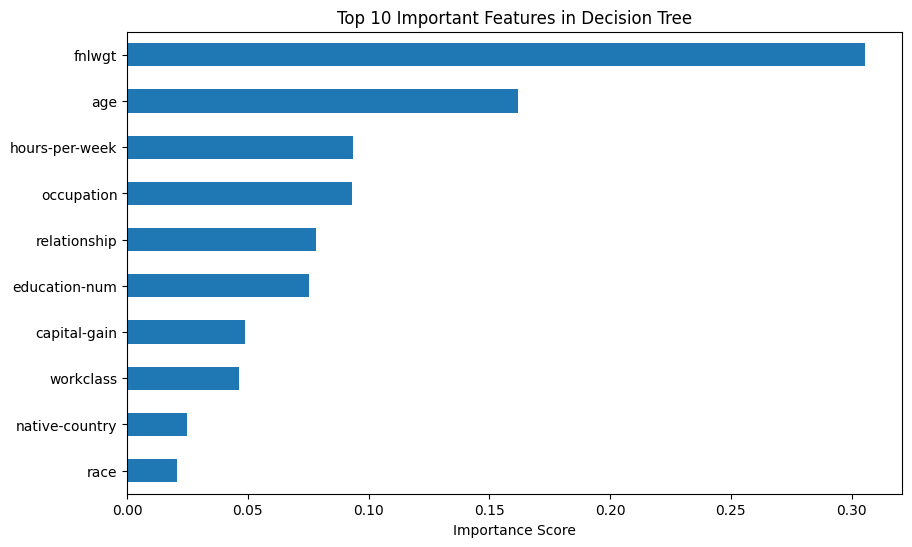

In [33]:
#Identify the most important features (which features are used at the top of the tree).
best_clf = DecisionTreeClassifier(max_depth=None, criterion='gini', random_state=42)
best_clf.fit(X_train, y_train)

feature_importances = pd.Series(best_clf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("\n🔹 Top 10 Most Important Features:\n")
print(feature_importances.head(10))

plt.figure(figsize=(10,6))
feature_importances.head(10).plot(kind='barh')
plt.title("Top 10 Important Features in Decision Tree")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()
